<a href="https://colab.research.google.com/github/Raptor-sj22/ML-Training/blob/main/Linear_Regression/Linear_Regression_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Summary

This code performs **4th degree polynominal regression** using TensorFlow/Keras to predict car fuel efficiency (`mpg`) based on input features: `cylinders`, `displacement`, and `weight`. The input features are normalized using a `Sikit`  to improve training stability and also a 'polynominal' preprocessing, and also reularization L2 . The model is trained on **300 samples** and validated on **98 samples**, using **1000 epochs**, a **batch size of 2**,**regularization rate of .0001** and a **learning rate of 0.0001**. It uses **Mean Squared Error (MSE)** as the loss function and **Stochastic Gradient Descent**.


In [ ]:
#@title Install required libraries

!pip install keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')



All requirements successfully installed.


In [ ]:
#@title Import Packages
from math import comb
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from tensorflow.keras import layers, optimizers, regularizers
import matplotlib.pyplot as plt
print(f" All Packages successfuly imported.")

 All Packages successfuly imported.


In [ ]:
#@title Defining Data
file_id = '1tmYsEsEWWvAznAT4k6vFY-qalJx-1w_t'
url = f'https://drive.google.com/uc?id={file_id}'
Original_Dataset = pd.read_csv(url)
display(Original_Dataset)
Original_Dataset.info()
Original_Dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
#@title Plotting the correlation matrix
numeric_data = Original_Dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation matrix using Plotly Express
fig = px.imshow(corr_matrix,text_auto=".2f",color_continuous_scale='bluered',title='Correlation Matrix Heatmap',aspect='auto')
fig.update_layout(width=1000, height=1000)
fig.show()

In [ ]:
#@title Cleaning Data
clean_data = Original_Dataset[['mpg', 'cylinders', 'displacement','weight']].iloc[:300].dropna()
Clean_validation_data= Original_Dataset[['mpg', 'cylinders', 'displacement','weight']].iloc[300:300+98].dropna()
# Separate into X1, X2, X3,and y
y = clean_data['mpg'].values
X1 = clean_data['cylinders'].values
X2 = clean_data['displacement'].values
X3 = clean_data['weight'].values
feature_names=['X1','X2','X3']
#validate data cleaning


y_validation = Clean_validation_data['mpg'].values
X1_validation = Clean_validation_data['cylinders'].values
X2_validation = Clean_validation_data['displacement'].values
X3_validation = Clean_validation_data['weight'].values



# Display the results
display( f"Data successfully cleaned from NaN values",f"Data Length: {len(X1)}" )

'Data successfully cleaned from NaN values'

'Data Length: 300'

In [ ]:
#@title Create the 3D scatter plot using Plotly Express
fig = px.scatter_3d(clean_data, x='cylinders', y='displacement', z='weight', color='mpg',title="Interactive 3D Scatter Plot", width=700, height=700)

# Show the plot
fig.show()

In [ ]:
#@title Input the Polynominal degree and Normalization of data


degree=4

# Adapt the normalizer to your input data
X_Cleaned = np.column_stack((X1, X2, X3))
X_Cleaned_validation = np.column_stack((X1_validation, X2_validation, X3_validation))

# 1. Apply PolynomialFeatures
poly = PolynomialFeatures(degree, include_bias=False)
X_poly = poly.fit_transform(X_Cleaned)
X_poly_validation = poly.fit_transform(X_Cleaned_validation)

# 2. Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X_poly)
X_validation = scaler.fit_transform(X_poly_validation)






pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.251824,0.847478,0.420164,1.300787,0.983795,0.792304,0.697213,0.569331,0.292282,1.337405,...,0.616704,0.540259,0.509363,0.429913,0.299225,0.316217,0.303091,0.254302,0.167701,0.036852
1,1.251824,1.242316,0.634210,1.300787,1.313310,0.934305,1.239973,0.962940,0.528557,1.337405,...,0.802843,1.172968,1.013086,0.793892,0.527542,1.004218,0.896324,0.732735,0.526147,0.279894
2,1.251824,0.948484,0.343153,1.300787,1.068089,0.741214,0.829296,0.600047,0.210308,1.337405,...,0.552125,0.686538,0.580352,0.424471,0.222855,0.467133,0.397951,0.288486,0.142734,-0.041508
3,1.251824,0.819932,0.339755,1.300787,0.960805,0.738960,0.661997,0.511065,0.206728,1.337405,...,0.549306,0.502136,0.455816,0.362281,0.219555,0.277773,0.251655,0.190924,0.094064,-0.044859
4,1.251824,0.801567,0.357875,1.300787,0.945479,0.750981,0.638712,0.507373,0.225855,1.337405,...,0.564374,0.477134,0.444675,0.365791,0.237225,0.252768,0.236546,0.186972,0.101420,-0.026882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-1.034612,-1.071618,-1.379406,-0.996127,-0.993297,-1.120947,-0.928992,-1.042813,-1.203432,-0.952339,...,-0.937996,-0.751607,-0.814661,-0.871395,-0.929148,-0.671469,-0.734227,-0.791059,-0.847517,-0.909755
296,-1.034612,-0.860425,-0.524356,-0.996127,-0.905171,-0.837321,-0.832221,-0.797013,-0.602132,-0.952339,...,-0.819570,-0.732763,-0.771978,-0.780184,-0.742433,-0.657747,-0.703731,-0.726626,-0.716563,-0.652093
297,-0.463003,-0.291124,0.449609,-0.565456,-0.492319,-0.182729,-0.470112,-0.210798,0.324049,-0.640566,...,-0.397367,-0.599123,-0.547882,-0.419874,-0.183606,-0.555823,-0.527655,-0.435065,-0.250578,0.068045
298,1.251824,1.242316,0.868641,1.300787,1.313310,1.089829,1.239973,1.094463,0.801574,1.337405,...,1.017925,1.172968,1.117661,0.993317,0.805885,1.004218,0.988772,0.912127,0.780246,0.592501


In [ ]:
#@title Defining and Traning the model

# Hyperparameters
epochs = 1000
batch_size = 2
learning_rate = 0.0001

# Custom callback to log RMSE and epoch numbers
class RMSELogger(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.epoch_nums = []
        self.rmses = []

    def on_epoch_end(self, epoch, logs=None):
        rmse = np.sqrt(logs.get('loss'))
        self.epoch_nums.append(epoch + 1)  # +1 to make it human-readable (start from 1)
        self.rmses.append(rmse)


# Build the model with normalization as the first layer
model = keras.Sequential([
    layers.Dense(1, kernel_regularizer=regularizers.l2(.0001))                 # Simple linear regression
])

# Compile the model
optimizer = optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# Train model with RMSE logger
rmse_logger = RMSELogger()
model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1, callbacks=[rmse_logger])




# Plot RMSE vs Epochs with explicit x-axis (epoch numbers)
# Create a DataFrame for plotting with plotly(required syntax of plotly!)
rmse_data = pd.DataFrame({'Epoch': rmse_logger.epoch_nums, 'RMSE': rmse_logger.rmses})

fig = px.line(rmse_data, x='Epoch', y='RMSE', title='RMSE vs. Epochs', labels={'Epoch': 'Epoch', 'RMSE': 'RMSE'})
fig.update_layout(width=500, height=500)
fig.show()
'''
# Get the weights from the model
trained_weights = model.layers[1].get_weights()  # layer[1] because layer[0] is the normalizer

normalized_w = trained_weights[0].flatten()
normalized_b = trained_weights[1][0]

# Get mean and variance from the normalizer (used during standardization)
means = normalizer.mean.numpy()
stds = np.sqrt(normalizer.variance.numpy())

# Transform weights back to original scale
Actual_weights = normalized_w / stds
Actual_bias = normalized_b - np.sum((normalized_w * means) / stds)

# Print true weights and bias
print(f"\nActual Learned Model (original scale): y = {Actual_weights[0,0]} * X1 + {Actual_weights[0,1]} * X2 + {Actual_weights[0,2]} * X3 + {Actual_bias}")
'''

Epoch 1/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 462.0567
Epoch 2/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 422.0888
Epoch 3/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 396.1651
Epoch 4/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 376.5919
Epoch 5/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 340.3725
Epoch 6/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 326.0352
Epoch 7/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 315.4760
Epoch 8/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 290.7680
Epoch 9/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 269.5395
Epoch 10/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 270.4772
Epoch 11/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 238.4801
Epoch 12/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229.9770
Epoch 13/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 217.3884
Epoch 14/1000
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 203.9728
E

'\n# Get the weights from the model\ntrained_weights = model.layers[1].get_weights()  # layer[1] because layer[0] is the normalizer\n\nnormalized_w = trained_weights[0].flatten()\nnormalized_b = trained_weights[1][0]\n\n# Get mean and variance from the normalizer (used during standardization)\nmeans = normalizer.mean.numpy()\nstds = np.sqrt(normalizer.variance.numpy())\n\n# Transform weights back to original scale\nActual_weights = normalized_w / stds\nActual_bias = normalized_b - np.sum((normalized_w * means) / stds)\n\n# Print true weights and bias\nprint(f"\nActual Learned Model (original scale): y = {Actual_weights[0,0]} * X1 + {Actual_weights[0,1]} * X2 + {Actual_weights[0,2]} * X3 + {Actual_bias}")\n'

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
gg=clean_data['mpg'].values
# Get grid inputs
x1_range = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2_range = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x1_flat = x1_grid.ravel()
x2_flat = x2_grid.ravel()

# Fix x3 as mean
x3_fixed = np.mean(X[:, 2])
x3_flat = np.full_like(x1_flat, x3_fixed)

# Stack flat values and apply PolynomialFeatures of degree 4
grid_points = np.vstack([x1_flat, x2_flat, x3_flat]).T  # shape (n_points, 3)
poly = PolynomialFeatures(degree=4, include_bias=False)
grid_poly = poly.fit_transform(grid_points)  # shape (n_points, 34)

# Predict using trained weights
weights, bias = model.layers[0].get_weights()  # weights shape (34, 1)
z_pred = np.dot(grid_poly, weights) + bias  # shape (n_points, 1)
z_grid = z_pred.reshape(x1_grid.shape)

# Plotting original data points
# Plotting original data points
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=gg,
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.7),
    name='Data Points'
))

# Plotting regression surface
fig.add_trace(go.Surface(
    x=x1_range, y=x2_range, z=z_grid,
    colorscale='Viridis',
    opacity=0.6,
    name='Fitted Surface'
))

# Layout with width and height set to 1000
fig.update_layout(
    title='3D Polynomial Regression Surface Fit (Degree 4)',
    scene=dict(
        xaxis_title='X1 (Cylinders)',
        yaxis_title='X2 (Displacement)',
        zaxis_title='MPG'
    ),
    width=1000,
    height=1000
)

fig.show()

In [ ]:
#@title Validiating the model



Actual_mpg = Clean_validation_data['mpg'].values
Predicted_mpg = model.predict(X_validation).flatten()



#Actual_weights[0,0] * X1 + Actual_weights[0,1] * X2 + Actual_weights[0,2] * X3 + Actual_bias
Loss_L1=abs(Actual_mpg-Predicted_mpg)
df = pd.DataFrame({
    'Actual_mpg': Actual_mpg,
    'Predicted_mpg': Predicted_mpg,
    'Loss_L1': Loss_L1
})
display(df)
Total_loss=sum(Loss_L1)
print('total loss',Total_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


,Actual_mpg,Predicted_mpg,Loss_L1
0,23.9,12.295036,11.604964
1,34.2,24.475664,9.724336
2,34.5,25.069424,9.430576
3,31.8,27.680466,4.119534
4,37.3,26.042213,11.257787
...,...,...,...
93,27.0,15.921047,11.078953
94,44.0,25.727587,18.272413
95,32.0,21.812963,10.187037
96,28.0,18.715265,9.284735


total loss 1080.82006893158


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


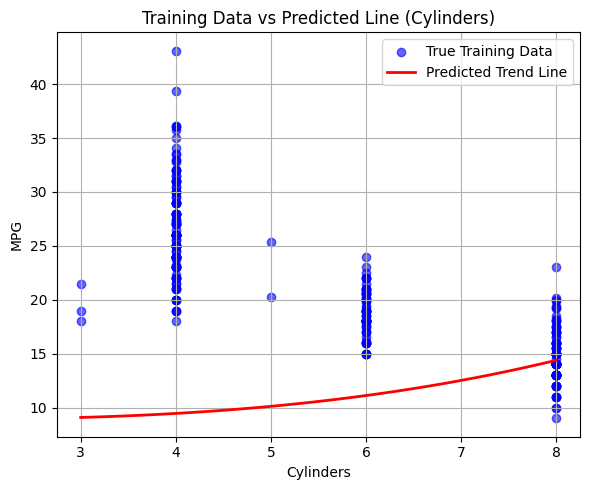

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


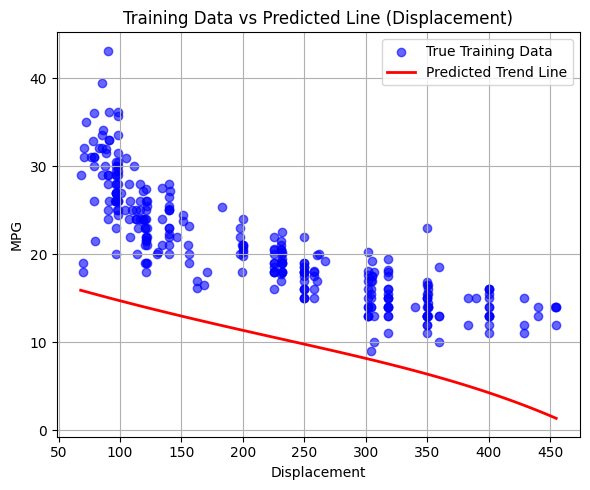

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


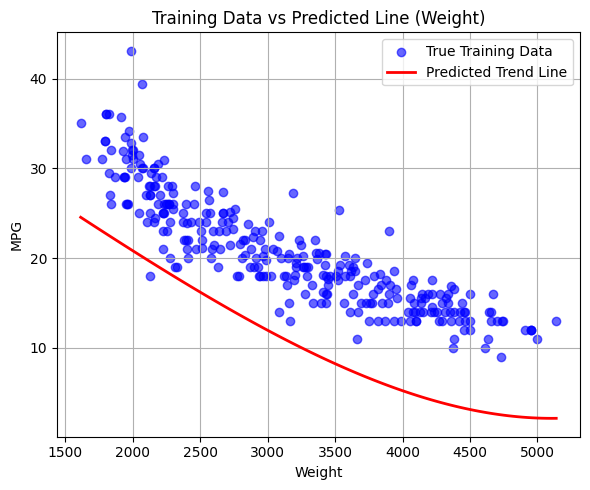

In [ ]:
# Reuse variables from training data
X_raw = X_Cleaned  # original features (before poly/normalize)
X_scaled = X  # normalized poly features
true_mpg = y  # actual labels

train_feature_names = ['Cylinders', 'Displacement', 'Weight']
train_features = [X1, X2, X3]

for i in range(3):
    feature_range = np.linspace(np.min(train_features[i]), np.max(train_features[i]), 100)

    # Prepare input matrix with varying one feature and fixing others at mean
    input_matrix = np.zeros((100, 3))
    for j in range(3):
        if j == i:
            input_matrix[:, j] = feature_range
        else:
            input_matrix[:, j] = np.mean(train_features[j])


    input_poly = poly.transform(input_matrix)
    input_scaled = scaler.transform(input_poly)



    # Predict using the trained model
    predicted_line = model.predict(input_scaled).flatten()

    # Plotting
    plt.figure(figsize=(6, 5))
    plt.scatter(train_features[i], true_mpg, alpha=0.6, label='True Training Data', color='blue')
    plt.plot(feature_range, predicted_line, color='red', linewidth=2, label='Predicted Trend Line')
    plt.xlabel(train_feature_names[i])
    plt.ylabel('MPG')
    plt.title(f'Training Data vs Predicted Line ({train_feature_names[i]})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [ ]:
# Input value
cylinder_input = 5  # change this to any number of cylinders you want

# Fix the other features
displacement_fixed = np.mean(X2)
weight_fixed = np.mean(X3)

# Build a single input row
input_raw = np.array([[cylinder_input, displacement_fixed, weight_fixed]])

# Polynomial transform and normalize
input_poly = poly.transform(input_raw)
input_scaled = scaler.transform(input_poly)

# Predict
predicted_mpg = model.predict(input_scaled).flatten()[0]

print(f"Predicted MPG for {cylinder_input} cylinders: {predicted_mpg:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted MPG for 5 cylinders: 10.11


In [ ]:
X3

array([3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 3563,
       3609, 3761, 3086, 2372, 2833, 2774, 2587, 2130, 1835, 2672, 2430,
       2375, 2234, 2648, 4615, 4376, 4382, 4732, 2130, 2264, 2228, 2046,
       2634, 3439, 3329, 3302, 3288, 4209, 4464, 4154, 4096, 4955, 4746,
       5140, 2962, 2408, 3282, 3139, 2220, 2123, 2074, 2065, 1773, 1613,
       1834, 1955, 2278, 2126, 2254, 2408, 2226, 4274, 4385, 4135, 4129,
       3672, 4633, 4502, 4456, 4422, 2330, 3892, 4098, 4294, 4077, 2933,
       2511, 2979, 2189, 2395, 2288, 2506, 2164, 2100, 4100, 3672, 3988,
       4042, 3777, 4952, 4464, 4363, 4237, 4735, 4951, 3821, 3121, 3278,
       2945, 3021, 2904, 1950, 4997, 4906, 4654, 4499, 2789, 2279, 2401,
       2379, 2124, 2310, 2472, 2265, 4082, 4278, 1867, 2158, 2582, 2868,
       3399, 2660, 2807, 3664, 3102, 2875, 2901, 3336, 1950, 2451, 1836,
       2542, 3781, 3632, 3613, 4141, 4699, 4457, 4638, 4257, 2219, 1963,
       2300, 1649, 2003, 2125, 2108, 2246, 2489, 23